In [2]:
import pandas as pd

In [37]:
# read data
df = pd.read_csv("DisneylandReviews.csv", encoding='ISO-8859-1')
reviews_df = df[df["Year_Month"] != "missing"]

In [38]:
reviews_df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [39]:
# split year_month to year and month columns
reviews_df[['Year','Month']] = reviews_df["Year_Month"].str.split("-",expand=True,)
# delete year_month column
del reviews_df['Year_Month']
reviews_df.head()

/Users/sherman/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month
0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4
1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5
2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4
3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4
4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4


In [40]:
reviews_df.head()

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month
0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4
1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5
2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4
3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4
4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4


In [41]:
# create the label
reviews_df["is_good_review"] = reviews_df["Rating"].apply(lambda x: 1 if x > 3 else 0)
reviews_df.head()

/Users/sherman/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,is_good_review
0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4,1
1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5,1
2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4,1
3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4,1
4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4,1


In [42]:
# get a sample
reviews_df = reviews_df.sample(frac = 0.1, replace = False, random_state=42)

In [43]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [44]:
import string
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sherman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sherman/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/sherman/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [45]:
# clean text data
reviews_df["review_clean"] = reviews_df["Review_Text"].apply(lambda x: clean_text(x))

In [46]:
reviews_df.head()

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,is_good_review,review_clean
27680,122944085,5,United States,Spotlessly clean and so organized considering ...,Disneyland_California,2011,10,1,spotlessly clean organize consider thousand vi...
35899,290851203,5,United Kingdom,"Pricey but worth it, unfortunately the big thu...",Disneyland_Paris,2015,7,1,pricey worth unfortunately big thunder mountai...
23932,168087311,4,Canada,"Disneyland is a magical place. Everyone, parti...",Disneyland_California,2013,7,1,disneyland magical place everyone particularly...
36122,282417360,5,Pakistan,Disney land is a must when visiting Paris. The...,Disneyland_Paris,2015,6,1,disney land must visit paris frozen show best ...
8028,160953212,3,India,"The HK Disneyland is definitely small, but it'...",Disneyland_HongKong,2012,9,0,hk disneyland definitely small definitely fun ...


In [47]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["Review_Text"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sherman/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [48]:
reviews_df.head()

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,is_good_review,review_clean,neg,neu,pos,compound
27680,122944085,5,United States,Spotlessly clean and so organized considering ...,Disneyland_California,2011,10,1,spotlessly clean organize consider thousand vi...,0.000,0.786,0.214,0.4574
35899,290851203,5,United Kingdom,"Pricey but worth it, unfortunately the big thu...",Disneyland_Paris,2015,7,1,pricey worth unfortunately big thunder mountai...,0.115,0.567,0.317,0.9809
23932,168087311,4,Canada,"Disneyland is a magical place. Everyone, parti...",Disneyland_California,2013,7,1,disneyland magical place everyone particularly...,0.000,0.810,0.190,0.9214
36122,282417360,5,Pakistan,Disney land is a must when visiting Paris. The...,Disneyland_Paris,2015,6,1,disney land must visit paris frozen show best ...,0.028,0.843,0.129,0.7050
8028,160953212,3,India,"The HK Disneyland is definitely small, but it'...",Disneyland_HongKong,2012,9,0,hk disneyland definitely small definitely fun ...,0.000,0.796,0.204,0.9489


In [49]:
# add number of characters column
reviews_df["characters"] = reviews_df["Review_Text"].apply(lambda x: len(x))

# add number of words column
reviews_df["words"] = reviews_df["Review_Text"].apply(lambda x: len(x.split(" ")))

In [50]:
reviews_df.head()

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,is_good_review,review_clean,neg,neu,pos,compound,characters,words
27680,122944085,5,United States,Spotlessly clean and so organized considering ...,Disneyland_California,2011,10,1,spotlessly clean organize consider thousand vi...,0.000,0.786,0.214,0.4574,81,12
35899,290851203,5,United Kingdom,"Pricey but worth it, unfortunately the big thu...",Disneyland_Paris,2015,7,1,pricey worth unfortunately big thunder mountai...,0.115,0.567,0.317,0.9809,468,87
23932,168087311,4,Canada,"Disneyland is a magical place. Everyone, parti...",Disneyland_California,2013,7,1,disneyland magical place everyone particularly...,0.000,0.810,0.190,0.9214,360,58
36122,282417360,5,Pakistan,Disney land is a must when visiting Paris. The...,Disneyland_Paris,2015,6,1,disney land must visit paris frozen show best ...,0.028,0.843,0.129,0.7050,297,58
8028,160953212,3,India,"The HK Disneyland is definitely small, but it'...",Disneyland_HongKong,2012,9,0,hk disneyland definitely small definitely fun ...,0.000,0.796,0.204,0.9489,407,73


In [51]:
# create doc2vec vector columns
!pip install gensim
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews_df["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = reviews_df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
reviews_df = pd.concat([reviews_df, doc2vec_df], axis=1)

In [52]:
reviews_df.head()

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,is_good_review,review_clean,neg,neu,pos,compound,characters,words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
27680,122944085,5,United States,Spotlessly clean and so organized considering ...,Disneyland_California,2011,10,1,spotlessly clean organize consider thousand vi...,0.000,0.786,0.214,0.4574,81,12,-0.071126,0.057019,0.080949,0.085475,-0.058735
35899,290851203,5,United Kingdom,"Pricey but worth it, unfortunately the big thu...",Disneyland_Paris,2015,7,1,pricey worth unfortunately big thunder mountai...,0.115,0.567,0.317,0.9809,468,87,-0.327981,-0.059187,0.124796,0.029215,0.122132
23932,168087311,4,Canada,"Disneyland is a magical place. Everyone, parti...",Disneyland_California,2013,7,1,disneyland magical place everyone particularly...,0.000,0.810,0.190,0.9214,360,58,-0.580643,-0.254390,0.132053,0.142409,0.097443
36122,282417360,5,Pakistan,Disney land is a must when visiting Paris. The...,Disneyland_Paris,2015,6,1,disney land must visit paris frozen show best ...,0.028,0.843,0.129,0.7050,297,58,-0.134181,-0.158695,0.095718,0.079927,0.246045
8028,160953212,3,India,"The HK Disneyland is definitely small, but it'...",Disneyland_HongKong,2012,9,0,hk disneyland definitely small definitely fun ...,0.000,0.796,0.204,0.9489,407,73,-0.126392,0.330591,0.186298,0.203213,0.104900


In [53]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(reviews_df["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews_df.index
reviews_df = pd.concat([reviews_df, tfidf_df], axis=1)
reviews_df.head()

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,is_good_review,review_clean,neg,...,word_yet,word_york,word_you,word_young,word_yr,word_yrs,word_yum,word_yummy,word_zero,word_zone
27680,122944085,5,United States,Spotlessly clean and so organized considering ...,Disneyland_California,2011,10,1,spotlessly clean organize consider thousand vi...,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35899,290851203,5,United Kingdom,"Pricey but worth it, unfortunately the big thu...",Disneyland_Paris,2015,7,1,pricey worth unfortunately big thunder mountai...,0.115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23932,168087311,4,Canada,"Disneyland is a magical place. Everyone, parti...",Disneyland_California,2013,7,1,disneyland magical place everyone particularly...,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36122,282417360,5,Pakistan,Disney land is a must when visiting Paris. The...,Disneyland_Paris,2015,6,1,disney land must visit paris frozen show best ...,0.028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8028,160953212,3,India,"The HK Disneyland is definitely small, but it'...",Disneyland_HongKong,2012,9,0,hk disneyland definitely small definitely fun ...,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# show is_good_review distribution
reviews_df["is_good_review"].value_counts(normalize = True)

1    0.803696
0    0.196304
Name: is_good_review, dtype: float64

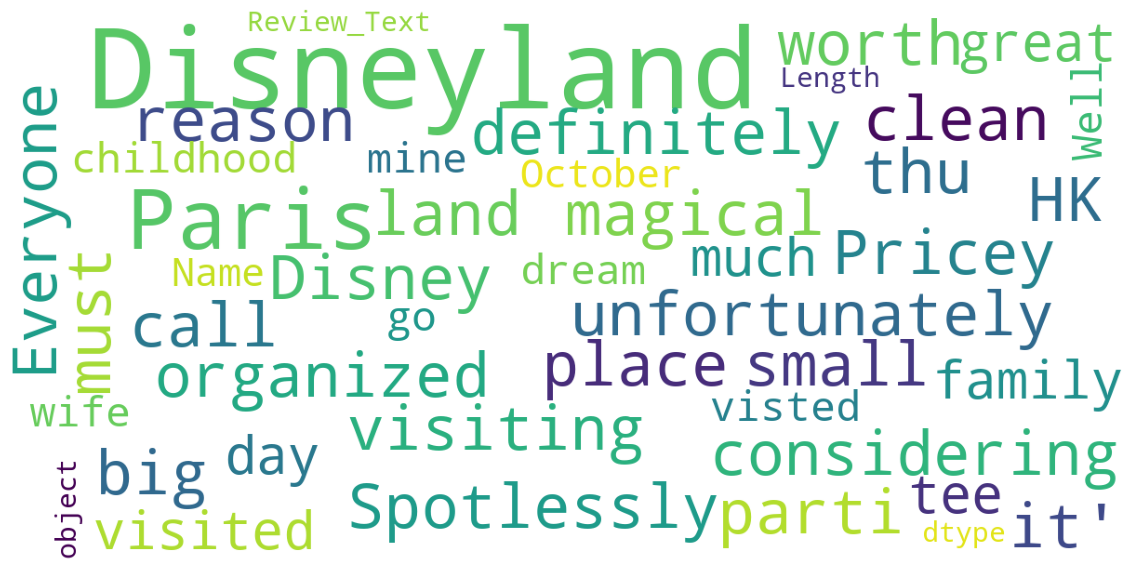

In [55]:
# wordcloud function

!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(reviews_df["Review_Text"])

In [56]:
# highest positive sentiment reviews (with more than 5 words)
reviews_df[reviews_df["words"] >= 3].sort_values("pos", ascending = False)[["Review_Text", "pos"]].head(10)

,Review_Text,pos
31529,"great fun, great characters, great shows and p...",0.686
26164,Wonderful time!!! Great vacation with family ...,0.671
10750,Best park ever. In love with every single deta...,0.628
40925,The park of my dreams. Cheyenne hotel is so a...,0.623
27097,I loved everything! :) It's the Happiest Plac...,0.587
10095,"Amazing! Small , easy to navigate with all the...",0.584
443,the best every to go to the best every the bes...,0.583
41722,Lovely time. 2nd time here. great rides and st...,0.530
449,"Love the Princess , Love the show and good pla...",0.528
38427,Great short break. Definitely a trip for all t...,0.526


In [57]:
# lowest negative sentiment reviews (with more than 5 words)
reviews_df[reviews_df["words"] >= 5].sort_values("neg", ascending = False)[["Review_Text", "neg"]].head(10)

,Review_Text,neg
42032,Dirty dirty dirty Overpriced poor quality f...,0.495
35129,Terrible waste of money . Just want you to sho...,0.362
12643,Three year old twins loved it but I was disapp...,0.332
13048,"Far too many people, rude service, uncomfortab...",0.328
40345,Fab time at Disney.... just avoid the restaura...,0.316
29593,The worst experience what we ever had with kid...,0.301
26536,Who doesn't love Disney? A little sad about th...,0.300
24447,Went here 5 years ago. Princesses was my favor...,0.288
12547,I was screamed at by one of the staff . Like w...,0.284
28048,What's not to love? Fun tip: Splash Mountain ...,0.275


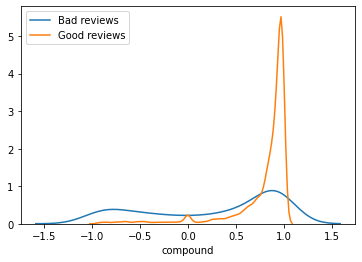

In [58]:
# plot sentiment distribution for positive and negative reviews

import seaborn as sns

for x in [0, 1]:
    subset = reviews_df[reviews_df['is_good_review'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Bad reviews"
    else:
        label = "Good reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

In [59]:
# feature selection
label = "is_good_review"
ignore_cols = [label, "Review_Text", "review_clean", "Reviewer_Location","Branch",""]
features = [c for c in reviews_df.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_df[features], reviews_df[label], test_size = 0.20, random_state = 42)


In [60]:
reviews_df.dtypes

Review_ID              int64
Rating                 int64
Reviewer_Location     object
Review_Text           object
Branch                object
                      ...   
word_yrs             float64
word_yum             float64
word_yummy           float64
word_zero            float64
word_zone            float64
Length: 2150, dtype: object

In [61]:
# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [62]:
# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
1,Rating,0.289183
7,compound,0.040693
6,pos,0.029286
4,neg,0.026420
5,neu,0.011789
11,doc2vec_vector_1,0.007765
1199,word_money,0.007333
12,doc2vec_vector_2,0.006227
916,word_hour,0.005585
9,words,0.005505


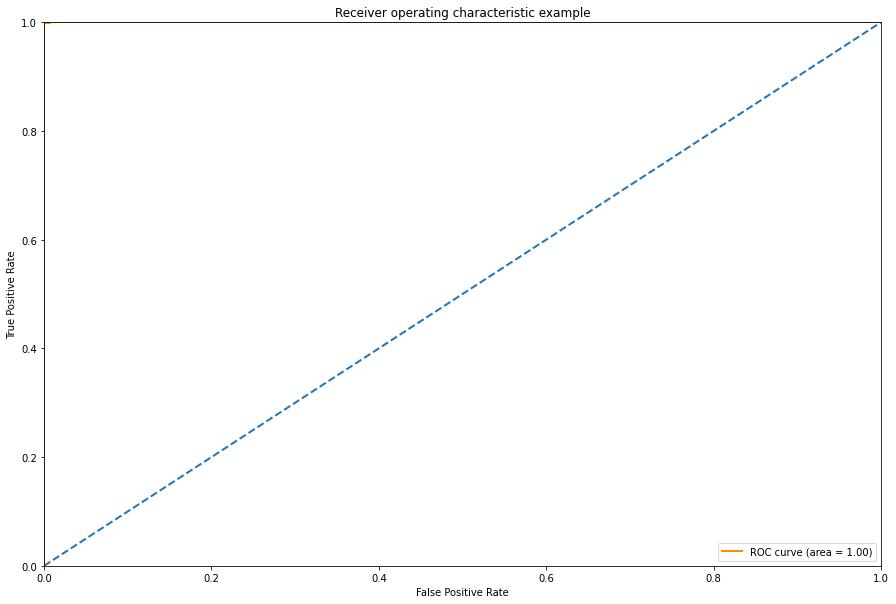

In [63]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()